# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

bakermiller = "#FF91AF"

In [3]:
# data inladen
ais_url = 'https://raw.githubusercontent.com/HoGentTIN/dsai-labs/refs/heads/main/data/ais.csv'
ais = pd.read_csv(ais_url)
# index instellen
ais = ais.set_index('id')
# categorische waarden omzetten
object_cols = ais.select_dtypes(include='object').columns.tolist()
for col in object_cols:
    print(f"setting column '{col}' to categorical type")
    ais[col] = ais[col].astype('category')

setting column 'sex' to categorical type
setting column 'sport' to categorical type


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

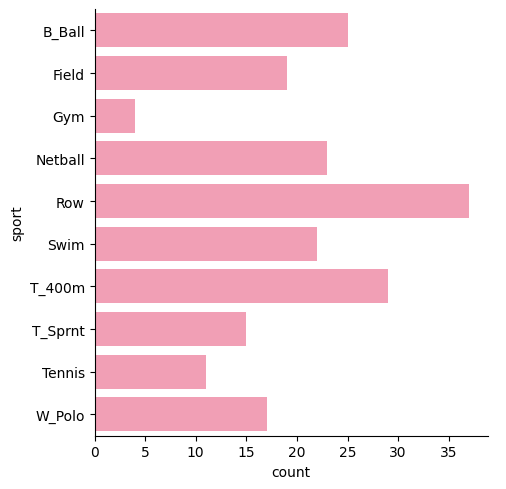

In [11]:
sns.catplot(data=ais, y='sport', kind='count', color=bakermiller)

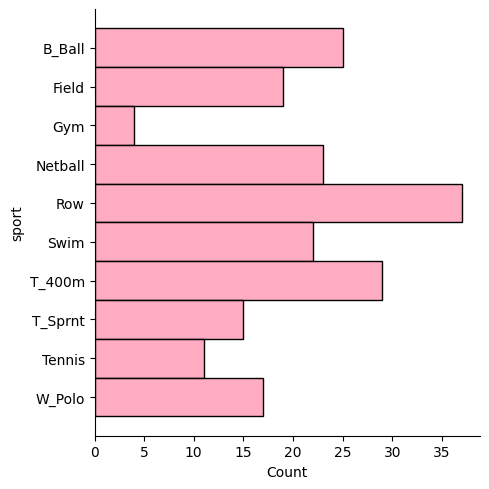

In [44]:
sns.displot(data=ais, y='sport', color=bakermiller)

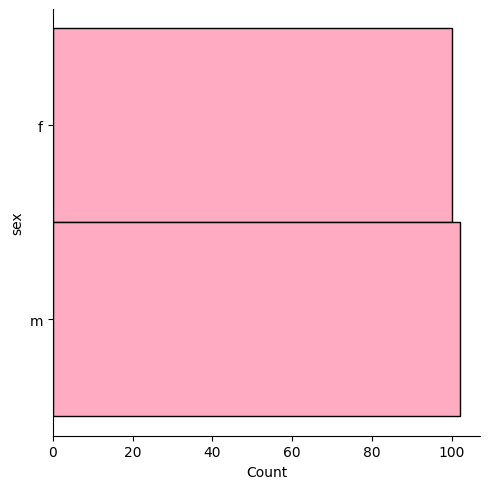

In [42]:
sns.displot(data=ais, y="sex", color=bakermiller)

/tmp/ipykernel_385173/1114258850.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=ais, kind='count', y='sex', palette=[bakermiller, 'lightblue'])


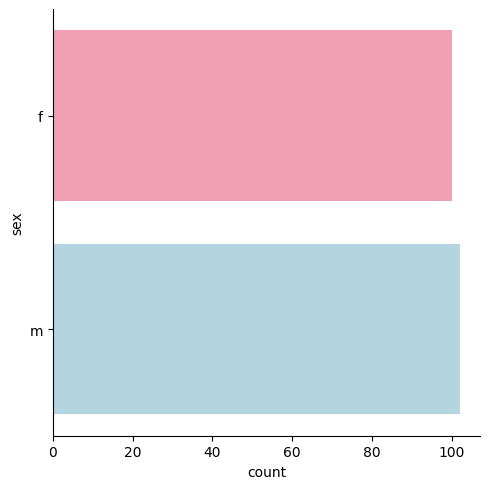

In [38]:
sns.catplot(data=ais, kind='count', y='sex', palette=[bakermiller, 'lightblue'])

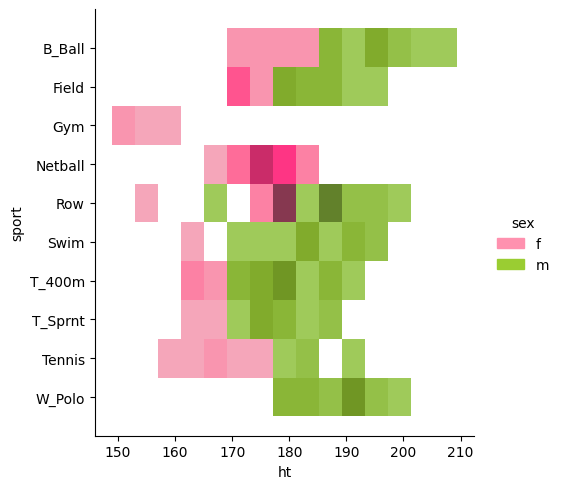

In [48]:
sns.displot(data=ais, x='ht', y='sport', hue='sex', palette=[bakermiller, 'yellowgreen'])

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:


In [74]:
def print_measures_of_tendency_ratio(df):
    # ht
    print(f"mean: {df.ht.mean():.3f}")
    print(f"stdev: {df.ht.std():.3f}")
    print(f"min: {df.ht.quantile(0):.3f}")
    print(f"Q1: {df.ht.quantile(0.25):.3f}")
    print(f"median: {df.ht.quantile(0.5):.3f}")
    print(f"Q3: {df.ht.quantile(0.75):.3f}")
    print(f"max: {df.ht.quantile(1):.3f}")
    print(f"IQR: {df.ht.quantile(0.75) - df.ht.quantile(0.25):.3f}")




1. the rowers
   


In [77]:
# sex
selection1 = ais[ais['sport'] == 'Row']
print(selection1.sex.value_counts())
print(f"mode: {selection1.sex.mode()[0]}")

# ht
print_measures_of_tendency_ratio(selection1)

sex
f    22
m    15
Name: count, dtype: int64
mode: f
mean: 182.376
stdev: 7.798
min: 156.000
Q1: 179.300
median: 181.800
Q3: 186.300
max: 198.000
IQR: 7.000


2. the rowers, netball and tennis players together
   


In [78]:
selection2 = ais[(ais['sport'] == 'Row') | (ais['sport'] == 'Netball') | (ais['sport'] == 'Tennis')]
print(selection2.sex.value_counts())
print(f"mode: {selection2.sex.mode()[0]}")

# ht
print_measures_of_tendency_ratio(selection2)

sex
f    52
m    19
Name: count, dtype: int64
mode: f
mean: 179.066
stdev: 7.936
min: 156.000
Q1: 174.250
median: 179.500
Q3: 183.400
max: 198.000
IQR: 9.150


3. the female basketball players and rowers together

In [79]:
selection3 = ais[
    (ais["sex"] == "f") & ((ais["sport"] == "Basketball") | (ais["sport"] == "Row"))
]
print(selection3.sex.value_counts())
print(f"mode: {selection3.sex.mode()[0]}")

# ht
print_measures_of_tendency_ratio(selection3)

sex
f    22
m     0
Name: count, dtype: int64
mode: f
mean: 178.859
stdev: 5.970
min: 156.000
Q1: 177.600
median: 179.650
Q3: 181.200
max: 186.300
IQR: 3.600


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |